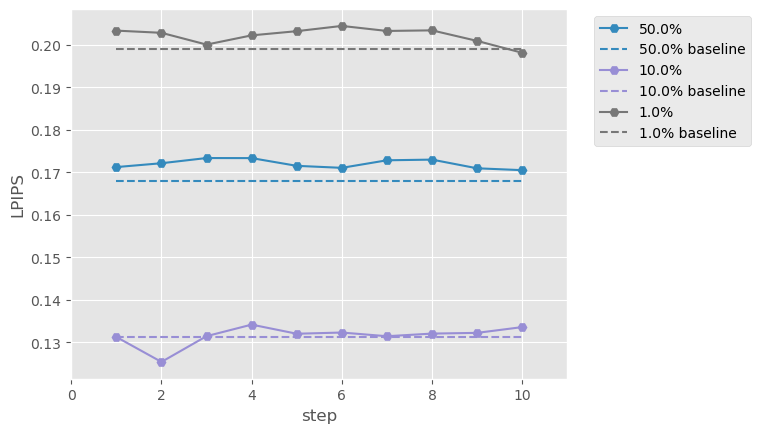

In [8]:
import utils
import torch
import torchvision
import torchvision.datasets as dset
import numpy
import matplotlib.pyplot as plt

import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

des = ['50.0%' ,'10.0%', '1.0%']
colors = ['C1', 'C1', 'C2', 'C2', 'C3', 'C3']
color_iterate = 0

choice = 'LPIPS'
# choice = 'PSNR'

baseline = []
for u, condense_rate in enumerate([2, 10, 100], 0):

    if condense_rate == 2:
        selected_indices = [989, 16103, 9745, 43520, 10860, 20737, 20953, 9129, 44840, 26979, 41081, 14762, 45686, 43308, 27682, 10884, 8785, 3670, 39376, 19380]
        temp_set = torchvision.datasets.CIFAR10(root='~/data/CIFAR10', train=True,
                                        download=False, transform=transform)
        origin_set = torch.utils.data.Subset(temp_set, selected_indices)
        origin_loader = torch.utils.data.DataLoader(origin_set, batch_size=1,
                                          shuffle=False, num_workers=0)
    elif condense_rate == 100:
        selected_indices = [19277, 48289, 41574, 3211, 20816, 4798, 2639, 33255, 40401, 45763, 
                    19480, 9881, 19103, 439, 37324, 32220, 17633, 17396, 47473, 1260, 
                    28380, 12991, 2459, 12492, 24291, 199, 24795, 30820, 22178, 39589, 
                    16624, 46548, 13483, 46380, 19084, 6124, 2660, 31127, 40022, 436,  13861, 1195, 26137, 2233, 21798, 30114, 46603, 32376, 43727, 34989, 10911, 29879, 11682, 16213, 16918, 40418, 30267, 10811, 31987, 1214, 16230, 44770, 40586, 8023, 33447, 19716, 32484, 22112, 31450, 24445, 26178, 5864, 21760, 11374, 20233, 11029, 28212, 46706, 5322, 48071, 46632, 8355, 46749, 4941, 32403, 29225, 3570, 29492, 32233, 37672, 30428, 32090, 15352, 45621, 34026, 10353, 5457, 6373, 48009, 23767, 35070, 942, 47349, 38902, 45687, 26158, 15770, 15577, 44954, 39405, 38487, 27268, 10359, 3779, 44412, 8869, 11075, 23477, 1287, 41568, 29068, 14481, 45466, 10963, 41733, 14167, 105, 29552, 27773, 15506, 34429, 37743, 19363, 35357, 29894, 38257, 8475, 35404, 3467, 38785, 12260, 37428, 34278, 11163, 22882, 5632, 25600, 15558, 23088, 28541, 31011, 41404, 10420, 41563, 42918, 24466, 7358, 27584, 8181, 5971, 47549, 18518, 36844, 29226, 2887, 11663, 23685, 25463, 18526, 26093, 7597, 15776, 49658, 21808, 34426, 35550, 35058, 15069, 21238, 10248, 18223, 32743, 4101, 8225, 848, 1305, 11971, 14855, 2280, 10576, 24891, 4244, 30269, 41532, 38950, 18844, 41502, 22884, 40594, 39679, 649, 1024, 42602, 11713, 1139, 30144, 35655, 20189, 10018, 19806, 7216, 46082, 16743, 36657, 19257, 8264, 30214, 18248, 37397, 43959, 12501, 3297, 17212, 1184, 33792, 49956, 5240, 33644, 4008, 3814, 22803, 48885, 19392, 36581, 21922, 32687, 31177, 45424, 32482, 32477, 1288, 5296, 46457, 42564, 46450, 25628, 986, 29126, 8676, 30894, 37615, 43569, 1921, 29298, 26960, 27973, 42172, 16028, 35477, 35862, 40787, 12720, 41834, 27103, 32136, 7452, 25089, 13036, 16111, 43177, 27328, 12847, 9585, 29511, 7298, 17304, 14473, 46607, 23650, 39312, 34482, 42601, 44216, 32308, 32166, 41619, 24165, 32763, 7178, 4228, 15184, 45533, 7741, 15929, 32045, 8844, 34630, 31171, 42193, 44208, 8385, 38364, 36273, 37765, 32702, 37117, 11902, 40057, 43784, 253, 44802, 23859, 5664, 1685, 4950, 19126, 6185, 18960, 28308, 33601, 22049, 44029, 18771, 25667, 5329, 25081, 3792, 315, 39384, 24801, 9152, 40888, 21193, 6812, 27544, 16502, 34099, 30204, 46561, 45151, 9164, 49872, 44103, 40097, 3385, 34197, 30339, 47812, 18169, 19412, 3242, 5705, 49614, 16635, 13189, 24031, 6466, 24910, 8645, 42481, 7749, 5615, 26407, 36809, 19673, 3787, 2452, 25765, 40950, 44631, 4294, 30933, 9060, 7478, 25254, 6422, 28020, 19771, 3287, 37425, 20531, 48629, 22565, 42880, 42056, 26558, 13971, 2723, 1554, 20151, 48037, 21948, 35582, 7132, 21672, 5062, 25726, 8054, 43749, 9024, 14235, 9370, 22857, 39162, 43557, 24369, 27214, 21896, 43897, 18473, 4781, 20303, 33610, 41263, 20116, 43203, 13760, 48955, 15508, 22144, 34, 32029, 40854, 26706, 38661, 36817, 42643, 24769, 27860, 36533, 8260, 43517, 40027, 26497, 11888, 1657, 5813, 31163, 35395, 490, 26772, 19118, 48945, 32930, 40188, 33171, 42938, 1934, 43627, 38895, 40674, 19458, 21252, 2175, 711, 1855, 10979, 2085, 40770, 32803, 12898, 49758, 4709, 24933, 43682, 15947, 35777, 36662, 14933, 3797, 16525, 25643, 40862, 43914, 49013, 37805, 180, 44336, 21389, 22513, 37442, 31365, 3559, 33129, 11573, 48502, 398, 32224, 12717, 44752, 28892, 41878, 5625, 26459, 28219, 21772, 27501, 5180, 29635, 27946, 2726, 14841, 8742, 14185, 33035, 41501, 3641, 36962, 36958, 1860, 14691, 18685, 21379, 30766, 26330, 21915, 42613, 20092, 47949, 462, 44300, 12256, 30349, 12310, 35918, 2266, 43129, 24648, 33494, 24339, 23238, 47757, 39456, 29393, 31218, 3448, 32255, 4002, 19889, 47662, 3162, 30684, 27316, 46903, 25870, 18262, 49033, 47447, 30042, 21804, 46071, 4849, 29774, 43920, 38489, 21561, 9134, 34732, 45511, 45368, 12239, 39282, 29454, 39002, 18981, 42222, 15449, 18131, 11165, 2125, 42578, 20315, 3471, 14750, 11899, 918, 42537, 37501, 12089, 22235, 23782, 29579, 40831, 25662, 26503, 24489, 729, 12098, 19708, 6815, 12696, 49531, 44087, 7021, 36171, 12051, 44676, 12661, 686, 31696, 95, 29973, 10738, 21965, 16337, 27992, 37603, 26245, 44428, 3590, 8803, 25990, 29568, 12624, 25000, 49289, 3227, 28630, 3412, 9428, 13939, 39617, 25913, 37351, 35213, 21612, 16442, 8021, 7867, 2503, 17151, 49394, 9029, 11917, 31820, 26205, 11657, 2898, 9788, 1536, 31099, 22631, 3525, 10733, 7190, 31842, 19230, 4094, 4167, 37638, 8170, 37275, 23698, 8538, 25747, 31857, 12447, 39808, 36788, 47191, 43166, 49433, 46721, 10837, 44379, 9969, 43353, 45295, 30089, 42819, 32435, 7823, 2888, 20930, 14267, 1453, 33799, 37922, 914, 24282, 33492, 20788, 28481, 32993, 32953, 41940, 27667, 33274, 13687, 24732, 34754, 11719, 32802, 28367, 5206, 39087, 20597, 4417, 16387, 39756, 30651, 18041, 20062, 30082, 19629, 40262, 13136, 10892, 39432, 48487, 8521, 33775, 13514, 28366, 47286, 17473, 1054, 15072, 43247, 3711, 27657, 14758, 3261, 33592, 24267, 44604, 30562, 15579, 17502, 26356, 49010, 29195, 13775, 20191, 22222, 25724, 27712, 27145, 7331, 37379, 29727, 3157, 22883, 38163, 20690, 44081, 16589, 36499, 23773, 16652, 1698, 40893, 31350, 37190, 35869, 24088, 11260, 21268, 37679, 6986, 8904, 34733, 20109, 32157, 47438, 4790, 38615, 15037, 23621, 26397, 11553, 8619, 12787, 37985, 49659, 7725, 33921, 44560, 28087, 28145, 26291, 19638, 9224, 20678, 39276, 18517, 20028, 28364, 13950, 26796, 19777, 41205, 14863, 40866, 39798, 22130, 3726, 28101, 42034, 10339, 28898, 18897, 34296, 10840, 44782, 49000, 27261, 24692, 47646, 19374, 16178, 23617, 25987, 2255, 38009, 15223, 19479, 38607, 21175, 32609, 1702, 35678, 15161, 24688, 44724, 41689, 32356, 1391, 30557, 9410, 31919, 25794, 38221, 12189, 19648, 13851, 35447, 49415, 42884, 33459, 23031, 37384, 25823, 42265, 15128, 27337, 28762, 1399, 17890, 25618, 32714, 21432, 33410, 41207, 14286, 43014, 30955, 9378, 44382, 6989, 8717, 22954, 34333, 46449, 3155, 32543, 2463, 31066, 1479, 17935, 30329, 6138, 47770, 18675, 24059, 39433, 4501, 30509, 19379, 35035, 32357, 16395, 21477, 34514, 45398, 34152, 10680, 39193, 38382, 43400, 38899, 29493, 11948, 30515, 42207, 7934, 18190, 1177, 42050, 43278, 17973, 2024, 43578, 46131, 6036, 32984, 38082, 29440, 15373, 30728, 42462, 5851, 32301, 7570, 48329, 31956, 44554, 31937, 21614, 34995, 28483, 39025, 34860, 37427, 8103, 36713, 23225, 18498, 32442, 41633, 12104, 11797, 46647, 11232, 15287, 39754, 15495, 8290, 2961, 49073, 49864, 9532, 7917, 30936, 45880, 14510, 3381, 4691, 88, 29210, 5306, 340, 36787, 26868, 15570, 6516, 45183, 40753, 16769, 46178, 10859, 8428, 25936, 28309, 47709, 6114, 42025, 42047, 39816, 21632, 25303, 34502, 35746, 29221, 46243, 5519, 25173, 21542, 43376, 29059, 19923, 3755, 48345, 12793, 26989, 25393, 36288, 32724, 40825, 39688, 24614, 28774, 35592, 2308, 49601, 14278, 613, 17941, 530, 16641]
        
        temp_set = torchvision.datasets.CIFAR10(root='~/data/CIFAR10', train=True,
                                        download=False, transform=transform)
        origin_set = torch.utils.data.Subset(temp_set, selected_indices)
        origin_loader = torch.utils.data.DataLoader(origin_set, batch_size=1,
                                          shuffle=False, num_workers=0)

    else:
        origin_set = dset.ImageFolder(root='~/data/GM%d'%(condense_rate), transform=transform)
        origin_loader =  torch.utils.data.DataLoader(set, batch_size=1, shuffle=False, num_workers=0)


    step = 10
    avg_distances = []; min_distances = []; max_distances = []; std_distances = []

    for s in range(0, step + 1): # 1, ... 10 -> accumlation!!!!!
        if s != 0:
            # prepare the images
            set = dset.ImageFolder(root='~/data/SetOfGradients/GM%dipc/%d'%(condense_rate, s), transform=transform)
            loader =  torch.utils.data.DataLoader(set, batch_size=1, shuffle=False, num_workers=0)
            
            # for each step...
            d = []
            for i, data in enumerate(loader, 0):
                unpack_image, unpack_label = data
                for j, ref_data in enumerate(origin_loader, 0):
                    ref_image, ref_label = ref_data
                    
                    if choice == 'LPIPS':
                        d.append(utils.lpips_loss(unpack_image, ref_image))
                    elif choice == 'PSNR':
                        # value, name, format
                        d.append(utils.psnr(unpack_image, ref_image))
                
            avg_distances.append( numpy.average(d) )
            min_distances.append( min(d) )
            max_distances.append( max(d) )
            std_distances.append( numpy.std(d) )
        else:
            set = dset.ImageFolder(root='~/data/GM%dipc/GM%dipc-valid'%(condense_rate, condense_rate), transform=transform)
            loader =  torch.utils.data.DataLoader(set, batch_size=1, shuffle=False, num_workers=0)
            
            # for each step...
            d = []
            for i, data in enumerate(loader, 0):
                unpack_image, unpack_label = data
                for j, ref_data in enumerate(origin_loader, 0):
                    ref_image, ref_label = ref_data
                    
                    if choice == 'LPIPS':
                        d.append(utils.lpips_loss(unpack_image, ref_image))
                    elif choice == 'PSNR':
                        # value, name, format
                        d.append(utils.psnr(unpack_image, ref_image))
            
            baseline.append( numpy.average(d) )

    up_err = []
    down_err = []

    x = [int(i) for i in range(1, step+1)]
    y = [i for i in avg_distances]
    yerr = [tuple(std_distances)]
    base = [ baseline[u] for i in range(1, step+1) ]


    description = des[u]
    # plt.errorbar(x, y, yerr = yerr, marker='H', capsize=3,  label=description)
    plt.plot(x, y, marker='H',  label='%s'%(description), color=colors[color_iterate])
    color_iterate+= 1
    plt.plot(x, base, linestyle = '--', color=colors[color_iterate], label='%s baseline'%(description))
    color_iterate+= 1


plt.style.use('ggplot')
plt.xlim(0, 11)
plt.xlabel('step')
plt.ylabel(choice)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()